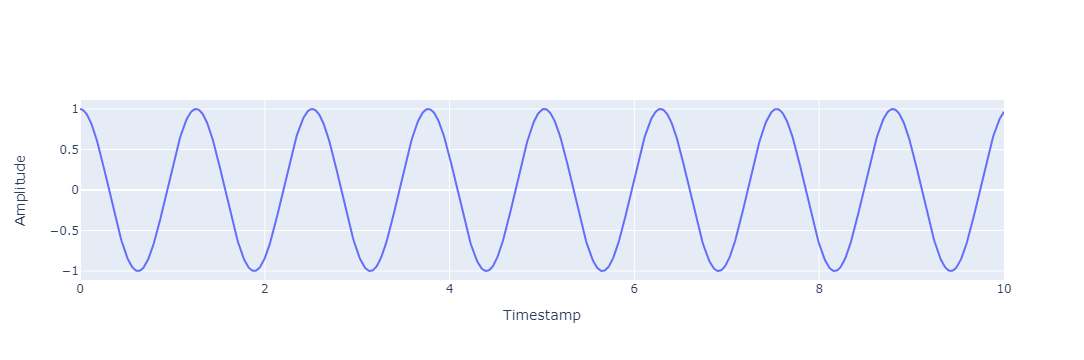

In [1]:
import numpy as np
import plotly.graph_objects as go

x_periodic = np.linspace(0, 10, 1000)
y_periodic = np.cos(5 * x_periodic)

fig = go.Figure(data=go.Scatter(x=x_periodic, y=y_periodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [2]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

In [3]:
y_periodic_embedded = embedder_periodic.fit_transform(y_periodic)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (99, 3)


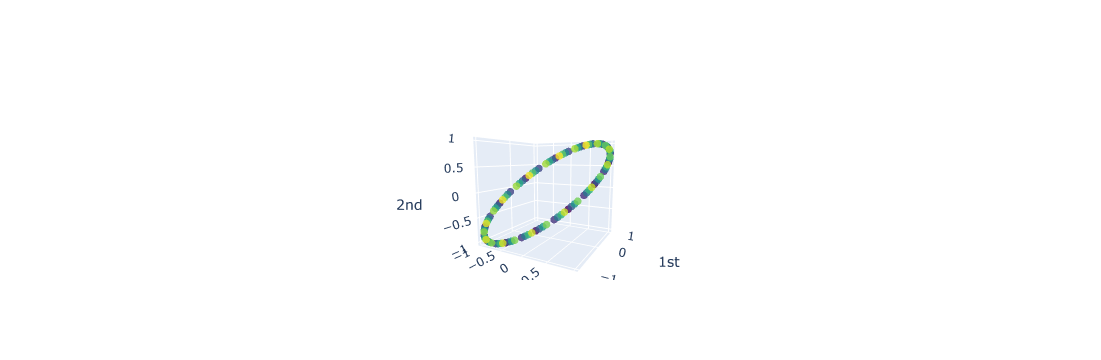

In [4]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(y_periodic_embedded)

In [5]:
x_nonperiodic = np.linspace(0, 50, 1000)
y_nonperiodic = np.cos(x_nonperiodic) + np.cos(np.pi * x_nonperiodic)

fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

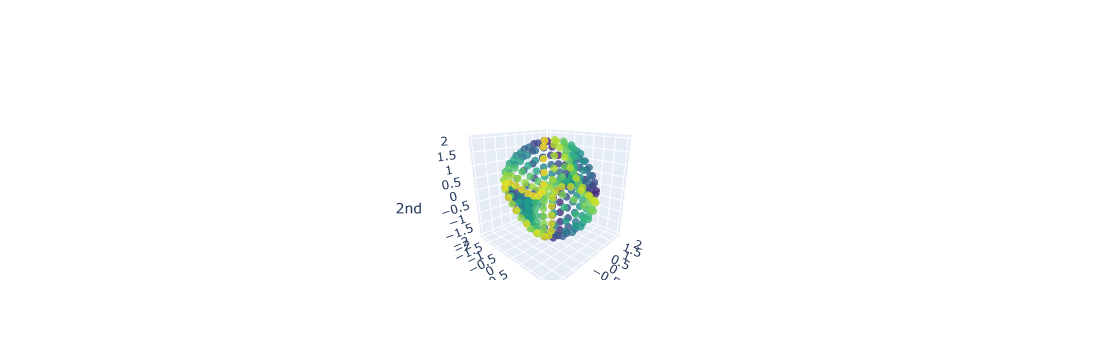

In [6]:
embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 16
stride = 3

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

plot_point_cloud(y_nonperiodic_embedded)

In [36]:
import pandas as pd
import util
import os
from datetime import date
data_path = util.get_data_path()
data = pd.read_csv(os.path.join(data_path, "LD_MT200_hour.csv"), parse_dates=["date"])
data["year"] = data["date"].apply(lambda x: x.year)
data["day_of_week"] = data["date"].apply(lambda x: x.dayofweek)
data = data.loc[(data["date"].dt.date >= date(2014, 1, 1)) & (data["date"].dt.date <= date(2014, 3, 1))]

features = ["hour", "day_of_week"]
# hours = pd.get_dummies(data["hour"])
# dows = pd.get_dummies(data["day_of_week"])
hours = data["hour"]
dows = data["day_of_week"]
X = np.c_[np.asarray(hours), np.asarray(dows)]
num_features = X.shape[1]
num_periods = len(data)
X = np.asarray(X).reshape((-1, num_periods, num_features))
# y = np.asarray(data["MT_200"]).reshape((-1, num_periods))

y = np.asarray(data["MT_200"])
# print(type(y))
yscaler = util.StandardScaler()
y = yscaler.fit_transform(y)

In [42]:
embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 24
stride = 2

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_embedded = embedder_nonperiodic.fit_transform(y)

plot_point_cloud(y_embedded)

In [43]:
y_embedded = y_embedded[None, :, :]

In [45]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
persistence.fit_transform_plot(y_embedded)

Persistence diagram for periodic signal


array([[[0.        , 0.00584195, 0.        ],
        [0.        , 0.00584195, 0.        ],
        [0.        , 0.0062453 , 0.        ],
        ...,
        [0.08072723, 0.08241079, 2.        ],
        [0.07680707, 0.08223312, 2.        ],
        [0.07422458, 0.07703947, 2.        ]]])